<a href="https://colab.research.google.com/github/thuyd12/AB-Test/blob/main/31_AB_test_on_batch_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 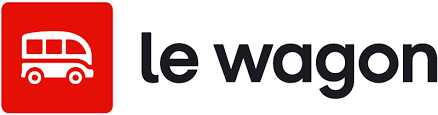

# Statistical tests

Shapr is looking for improving their users'conversion rate to premium. 

One of their idea is to limit daily batch to 10 cards (group B) versus 15 cards (group A).




a) Download [AB_test_premium_conversion.csv](https://drive.google.com/file/d/19j-xiLFAebFH6o80V2ItlzebgJkYTvbY/view?usp=sharing) and load it with Python

In [ ]:
import pandas as pd

df = pd.read_csv("AB_test_premium_conversion.csv")
df

,group,converted,type_of_subscription
0,B,0,NaN
1,B,0,NaN
2,B,0,NaN
3,A,0,NaN
4,B,0,NaN
...,...,...,...
19878,A,0,NaN
19879,A,0,NaN
19880,B,0,NaN
19881,B,0,NaN


b) Calculate conversion rate per group.

Hint: Can be achieved with only one aggregate function

In [ ]:
df.groupby("group")["converted"].mean()

group
A    0.030000
B    0.034908
Name: converted, dtype: float64

c) Can you conclude ? Is it significant ?

We cannot conclude, we need to verify it with a statistical test.

d) Which statistical test you should use here ?

We have two categorical features group A, B and converted to premium or not. We need to use a Chi-square test.

e) Study `pd.crosstab()` function in pandas. With this function, create a contingency table with group as index and converted as columns.

Store the result in a `CT`variable.

In [ ]:
CT = pd.crosstab(index=df['group'], columns=df['converted'])
CT

converted,0,1
group,,
A,9700,300
B,9538,345


f) Perform the test, we will accept a 5% risk. What do you conclude ?

In [ ]:
import scipy.stats as stats

# Perform Chi-squared test
chiRes = stats.chi2_contingency(CT)
# Details
print(f'p-value: {chiRes[1]}')

p-value: 0.055714070129600855


p-value > 0.05 we accept null hypothesis, conversion rate is similar in both groups.

g) If we accept a 6% risk intead ? Does it change something ?

p-value < 0.06, in this case we reject null hypothesis and conversion rate in group B is better.

h) Shapr at the time was ok for a 10% risk. 

What type of subscription users take in each group ?

In [ ]:
df.groupby(["group", "type_of_subscription"]).size()

group  type_of_subscription
A      12months                 14
       1month                  144
       3months                  96
       6months                  46
B      12months                 12
       1month                  244
       3months                  65
       6months                  24
dtype: int64

i) As a Data Analyst what do you suggest ? Should we keep 10 cards in batch or not ?

10 cards in batch lead to a better conversion rate but we can see that they subscribe much more to a 1 month program and not a longer one. In term of lifetime value, it's not sure that company will earn more money.

There is no obvious answer but I recommended to make the AB test lasts a bit more to observe if 1 month subscribers in group B took a longer subscription afterwards or not.